<a href="https://colab.research.google.com/github/BrianGakungi/WEEK-9-IP-KNN-AND-NAIVE-BAYES-CLASSIFIERS/blob/main/JOHN_NJAGI_WEEK_9_IP_DATASET_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.) DEFINING THE QUESTION: Correctly use K-nearest neighbours to predict the survival status of each passenger using variables in the dataset**

**2.) METRIC OF SUCCESS: The predicted values for survival status match those of the actual dataset**

**3.) UNDERSTANDING THE CONTEXT: We are supposed to use K-Nearest Neighbour classification to perform the prediction of whether a passenger survived the capsizing of the ship. We should be able to assess how accurate the classifier is and improve on the model.**




**4.) RECORDING THE EXPERIMENTAL DESIGN:**


*   loading and previewing dataset
*   Changing column names to lower case


*   dropping irrelevant columns
*   checking for missing values in the columns and filling them


*   checking for outliers in the columns using boxplots
*   splitting the dataset into 80-20, 70-30, 60-40 splits


*   scaling the data
*   looking for the optimal value for k using crossvalidation


*   using linear discriminant analysis to optimize our model
*   giving final conclusion











**5.) DATA VALIDITY: The data contains all the necessary variables for us to conduct the analysis. As a result we do not need to incorporate an external data.**

In [ ]:
# importing relevant libraries
import pandas as pd
import numpy as np

In [ ]:
# loading the dataset and previewing the first 5 rows
df = pd.read_csv("/content/train (5).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# previewing the last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# checking the number of records in the dataset
df.shape
# we have 891 rows and 12 columns

(891, 12)

In [ ]:
# checking if our columns have the right data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Changing all column names to lower case form
df.columns = df.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
# dropping irrelevant columns and previewing new dataset
df.drop(df.columns[[0, 3, 8]], axis = 1, inplace = True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
# checking for missing values in the columns
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
cabin       687
embarked      2
dtype: int64

In [ ]:
# Checking for missing values as a percentage of values
(df.isna().mean().round(4) * 100).sort_values(ascending = False)
# since the cabin column has more than 75% of its values as missing values we'll need to drop it

cabin       77.10
age         19.87
embarked     0.22
survived     0.00
pclass       0.00
sex          0.00
sibsp        0.00
parch        0.00
fare         0.00
dtype: float64

In [ ]:
# dropping the cabin column and previewing new dataset
df.drop(df.columns[[7]], axis = 1, inplace = True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Filling missing values in age column with the mean age
age = ["age"]
for column in age:
  df[column].fillna(df[column].mean(), inplace = True)  

In [ ]:
# Filling missing values in the embarked column with the mode embarked station
df.embarked.fillna(df.embarked.mode()[0], inplace = True)

In [ ]:
# confirming if there are any missing values left
df.isnull().sum()
# there are no missing values left in the columns

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [ ]:
# checking the unique values in the embarked column
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# checking the unique values in the sex column
df.sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
# converting values in the sex column to numerical values
df['sex'] = pd.factorize(df['sex'])[0]

In [ ]:
# checking the unique values in the sex column
df.sex.unique()
# male=0, female=1

array([0, 1])

In [ ]:
# converting values in the sex column to numerical values
df['embarked'] = pd.factorize(df['embarked'])[0]

In [ ]:
# checking the unique values in the embarked column
df.embarked.unique()
# S=0, C=1, Q=2

array([0, 1, 2])

**CHECKING FOR OUTLIERS**

In [ ]:
# we'll use boxplots for this
# importing relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


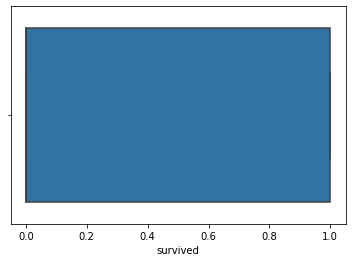

In [ ]:
# plotting boxplot for survived column
sns.boxplot(df["survived"])
# no outliers exist in the column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


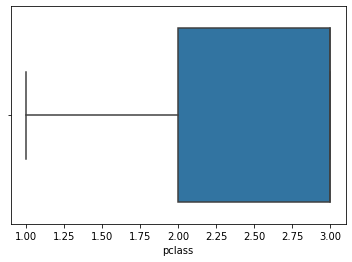

In [ ]:
# plotting boxplot for pclass column
sns.boxplot(df["pclass"])
# no outliers exist in the column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


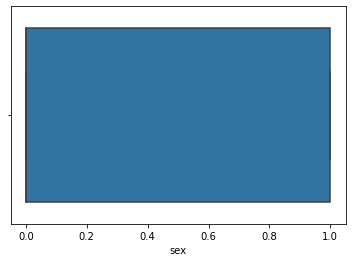

In [ ]:
# plotting boxplot for sex column
sns.boxplot(df["sex"])
# no outliers exist in the column

In [ ]:
df.age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


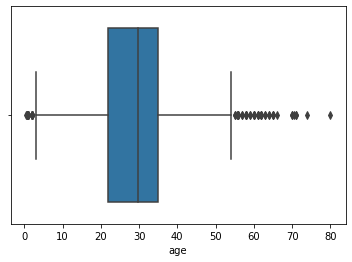

In [ ]:
# plotting boxplot for age column
sns.boxplot(df["age"])
# outliers exist but will not be removed in this column
# any decimals below 1 year will be assumed to be baby passengers having not attained the age of 1 year but are several months old

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


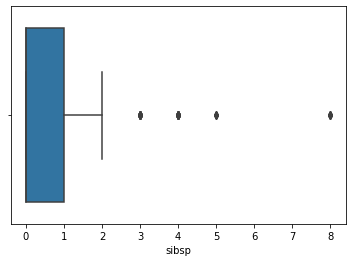

In [ ]:
# plotting boxplot for sibsp column
sns.boxplot(df["sibsp"])
# outliers exist in the column but will not be removed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


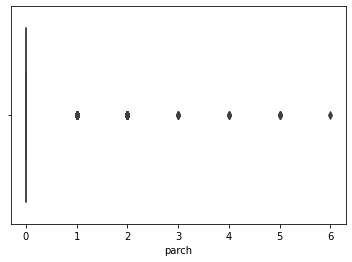

In [ ]:
# plotting boxplot for parch column
sns.boxplot(df["parch"])
# outliers exist in the column but will be preserved

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


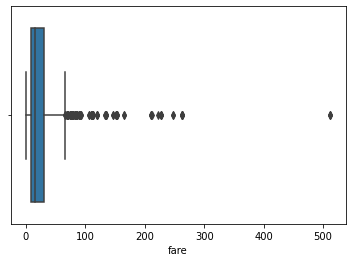

In [ ]:
# plotting boxplot for fare column
sns.boxplot(df["fare"])
# outliers exist in the column but will be preserved since the variation in fares is due to the the different passenger classes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


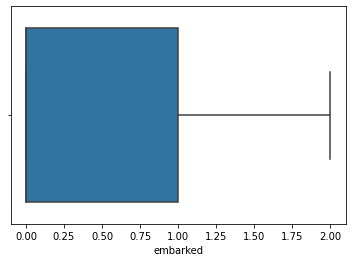

In [ ]:
# plotting boxplot embarked column
sns.boxplot(df["embarked"])
# no outliers exist in the column

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [ ]:
# Splitting our dataset into its attributes and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
# dividing our dataset into training and test splits i.e 80% training set and 20% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# performing feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# importing the KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# making predictions on our test data and evaluating the accuracy of the model
y_pred = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy of model when k=2 is",metrics.accuracy_score(y_test, y_pred))
# our original accuracy before optimization is 0.7151 with an 80-20 split on the dataset

Accuracy of model when k=2 is 0.7150837988826816


In [ ]:
# Evaluating the Algorithm and reporting the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# our model is able to make 92 and 36 correct predictions

[[92 17]
 [34 36]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       109
           1       0.68      0.51      0.59        70

    accuracy                           0.72       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.71      0.72      0.71       179



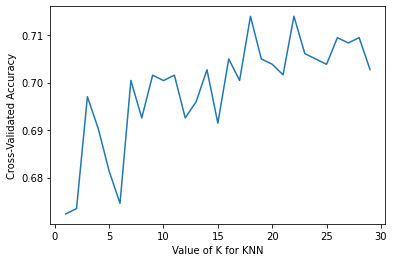

In [ ]:
# using crossvalidation to determine the optimal value for k 
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose a k range between 1 to 30
k_range = range(1, 30)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plotting to display different accuracies for different k values
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
# we can see that the optimal values for k is 17

In [ ]:
# evaluating accuracy at k=17
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy of model when k=17 is",metrics.accuracy_score(y_test, y_pred))
# the accuracy of 0.8045 is the highest attained

Accuracy of model when k=17 is 0.8044692737430168


In [ ]:
# Evaluating the Algorithm and reporting the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# our model is able to make 96 and 48 correct predictions which is an improvement from the original predictions

[[96 13]
 [22 48]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       109
           1       0.79      0.69      0.73        70

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
# Re-dividing our dataset into training and test splits i.e 70% training set and 30% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# performing feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# importing the KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)
# making predictions on our test data and evaluating the accuracy of the model
y_pred = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy of model when k=2 is",metrics.accuracy_score(y_test, y_pred))
# our original accuracy is 0.75 without optimization which is an improvement from the 80-20 split original accuracy 

Accuracy of model when k=2 is 0.75


In [ ]:
# Evaluating the Algorithm and reporting the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# our model is able to make 141 and 60 correct predictions

[[141  11]
 [ 56  60]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       152
           1       0.85      0.52      0.64       116

    accuracy                           0.75       268
   macro avg       0.78      0.72      0.72       268
weighted avg       0.77      0.75      0.74       268



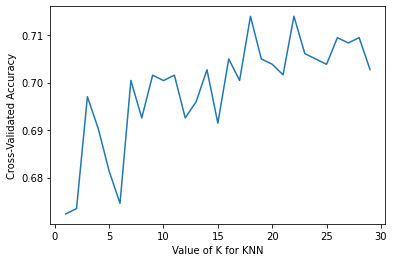

In [ ]:
# using crossvalidation to determine the optimal value for k 
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose a k range between 1 to 30
k_range = range(1, 30)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plotting to display different accuracies for different k values
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
# we can see that the optimal values for k is still 17

In [ ]:
# evaluating accuracy at k=17
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy of model when k=17 is",metrics.accuracy_score(y_test, y_pred))
# the accuracy of 0.7985 is lower than that of the 80-20 split when k=17

Accuracy of model when k=17 is 0.7985074626865671


In [ ]:
# Re-dividing our dataset into training and test splits i.e 60% training set and 40% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
# performing feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# importing the KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)
# making predictions on our test data and evaluating the accuracy of the model
y_pred = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy of model when k=2 is",metrics.accuracy_score(y_test, y_pred))
# our original accuracy is 0.77 without optimization which is an improvement from the 70-30 split original accuracy 

Accuracy of model when k=2 is 0.773109243697479


In [ ]:
# Evaluating the Algorithm and reporting the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# our model is able to make 197 and 79 correct predictions

[[197  19]
 [ 62  79]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       216
           1       0.81      0.56      0.66       141

    accuracy                           0.77       357
   macro avg       0.78      0.74      0.75       357
weighted avg       0.78      0.77      0.76       357



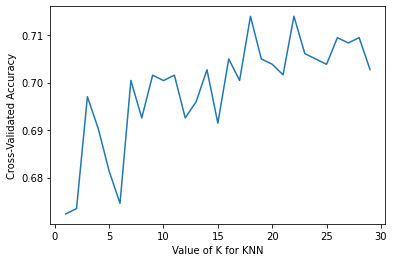

In [ ]:
# using crossvalidation to determine the optimal value for k 
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose a k range between 1 to 30
k_range = range(1, 30)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plotting to display different accuracies for different k values
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
# we can see that the optimal values for k is still 17

In [ ]:
# evaluating accuracy at k=17
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn import metrics
print("Accuracy of model when k=17 is",metrics.accuracy_score(y_test, y_pred))
# the accuracy of 0.8235 the highest we have obtained when k=17 when compared to the other splits.
# hence the 60-40 split is the optimal split

Accuracy of model when k=17 is 0.8235294117647058


In [ ]:
# LINEAR DISCRIMINANT ANALYSIS ON THE 60-40 SPLIT
# importing LDA from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
# Our accuracy  drops to 0.8039 from 0.8235 when we try to optimize the 60-40 split model 
# using LDA hence we should not implement it to improve our model's performance

[[190  26]
 [ 44  97]]
Accuracy0.803921568627451
